<a href="https://colab.research.google.com/github/SebastianWikt/DS4002-P3/blob/main/Scripts/ds4002p3movieanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#rm -r DS4002-P3/

In [2]:
! git clone https://github.com/SebastianWikt/DS4002-P3.git

Cloning into 'DS4002-P3'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 76 (delta 29), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (76/76), 14.25 MiB | 6.22 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

def loadData(file):
  # The column names are adopted from the dataset page on Kaggle
  df = pd.read_csv(file)
  return df

def plot_color_histograms(image_paths):
    for img_path in image_paths:
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        colors = ('r', 'g', 'b')
        plt.figure(figsize=(10, 5))
        plt.title(f'Color Histogram for {os.path.basename(img_path)}')

        for i, color in enumerate(colors):
            hist = cv2.calcHist([img], [i], None, [256], [0, 256])
            plt.plot(hist, color=color)
            plt.xlim([0, 256])
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')
        plt.show()

def check_color_channels(image_paths):
    for img_path in image_paths:
        img = cv2.imread(img_path)
        if len(img.shape) == 2:  # Grayscale images have 2 dimensions
            print(f'{os.path.basename(img_path)} is Grayscale')
        elif len(img.shape) == 3 and img.shape[2] == 3:  # RGB images have 3 dimensions
            print(f'{os.path.basename(img_path)} is RGB')
        else:
            print(f'{os.path.basename(img_path)} has an unusual format')

def check_image_quality(image_paths, min_resolution=(150, 150)):
    for img_path in image_paths:
        img = cv2.imread(img_path)
        # Check resolution
        height, width = img.shape[:2]
        if width < min_resolution[0] or height < min_resolution[1]:
            print(f'Low-resolution image: {os.path.basename(img_path)} - {width}x{height} pixels')

        # Check brightness (mean of pixel intensities)
        brightness = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).mean()
        print(f'{os.path.basename(img_path)} - Mean Brightness: {brightness:.2f}')

        # Check blur using Laplacian variance
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
        if laplacian_var < 100:  # Threshold for blur detection (adjust as needed)
            print(f'Blurred image: {os.path.basename(img_path)} - Variance: {laplacian_var:.2f}')

def get_kernel_dimensions(version, shape, divisor):
    image_width = shape[1]

    # original
    if version == 1:
        return 3, 3

    # square 10% width
    if version == 2:
        return int(0.1 * image_width / divisor), int(0.1 * image_width / divisor)

    # square 20% width
    if version == 3:
        return int(0.2 * image_width / divisor), int(0.2 * image_width / divisor)

In [4]:
df = pd.read_csv('/content/DS4002-P3/Data/MoviePosterData.csv')
genre_horror = df[df['Genre'] == 'Horror']
genre_romance = df[df['Genre'] == 'Romance']
genre_comedy = df[df['Genre'] == 'Comedy']

In [6]:
import os
import requests
from PIL import Image, ImageStat
from io import BytesIO
import numpy as np
import cv2

folder_path = '/content/images'
os.makedirs(folder_path, exist_ok=True)

image_paths = []

for i, url in enumerate(df['MoviePoster']):
    try:
        response = requests.get(url)
        image = Image.open(BytesIO(response.content))

        image = image.resize((106, 161), Image.Resampling.LANCZOS)


        image_filename = f"image_{i}.jpg"
        image_path = os.path.join(folder_path, image_filename)
        image.save(image_path)

        img = Image.open(image_path)

        # Get image size (width, height)
        width, height = img.size
        print(f"Image size: {width}x{height}")

        image_paths.append(image_path)

        # print(f"Saved image_{i}.jpg")
    except Exception as e:
        print(f"Failed to download {url}: {e}")
        image_paths.append(np.NaN)

df['LocalImagePath'] = image_paths

# Save the updated DataFrame back to a CSV
updated_csv_path = '/content/updated_movie_posters.csv'
df.to_csv(updated_csv_path, index=False)

Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161
Image size: 106x161


In [7]:
from sklearn.model_selection import train_test_split

# Split the dataset
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Save the train and test DataFrames as separate CSV files
train_csv_path = '/content/train_movie_posters.csv'
test_csv_path = '/content/test_movie_posters.csv'

train_df.to_csv(train_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)

In [8]:
### GRAPHS FROM FULL DATA
image_folder = folder_path
image_paths = [os.path.join(image_folder, img) for img in os.listdir(image_folder)]
# plot_color_histograms(image_paths)

In [9]:
# Calculating average image r,g,b and adding to dataframe
rgb_values = []
for i in range(550):
    if i == 444 or i == 496:
      rgb_values.append(np.NaN)
    else:
      img = Image.open(f'/content/images/image_{i}.jpg')
      img = img.convert('RGB')  # Ensure image is in RGB format
      img_array = np.array(img)
      rgb_values.append(img_array.mean(axis=(0, 1)))  # Calculate mean RGB values for each image
      df.loc[i, 'avg_r'] = rgb_values[i][0]
      df.loc[i, 'avg_g'] = rgb_values[i][1]
      df.loc[i, 'avg_b'] = rgb_values[i][2]

df.head()

,Genre,MoviePoster,Movie Title,LocalImagePath,avg_r,avg_g,avg_b
0,Romance,https://m.media-amazon.com/images/M/MV5BYjA4MT...,Malena,/content/images/image_0.jpg,176.973632,121.381402,66.941580
1,Romance,https://m.media-amazon.com/images/M/MV5BOTNmYz...,Amélie,/content/images/image_1.jpg,49.274581,68.166471,44.005332
2,Romance,https://m.media-amazon.com/images/M/MV5BYTY3Mm...,A Very Long Engagement,/content/images/image_2.jpg,141.185515,88.127564,51.819231
3,Romance,https://m.media-amazon.com/images/M/MV5BN2Q4Nj...,In the Mood for Love,/content/images/image_3.jpg,95.580159,54.822747,33.206434
4,Romance,https://m.media-amazon.com/images/M/MV5BYjIyND...,The Curious Case of Benjamin Button,/content/images/image_4.jpg,96.855737,81.615141,64.857612


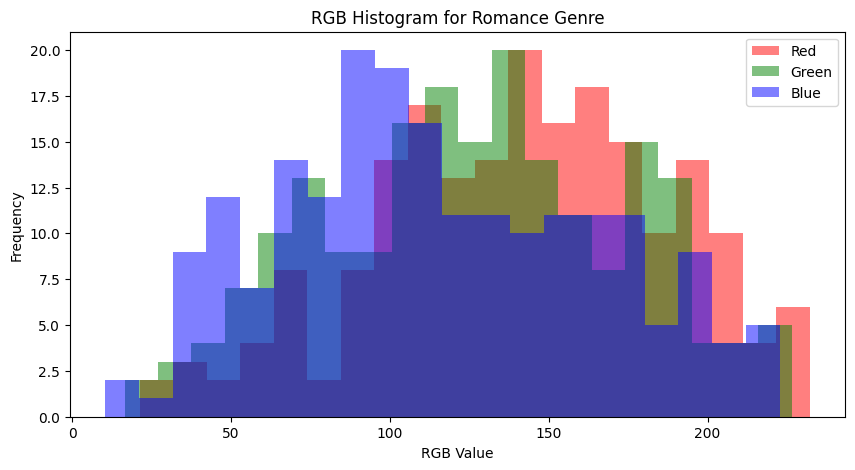

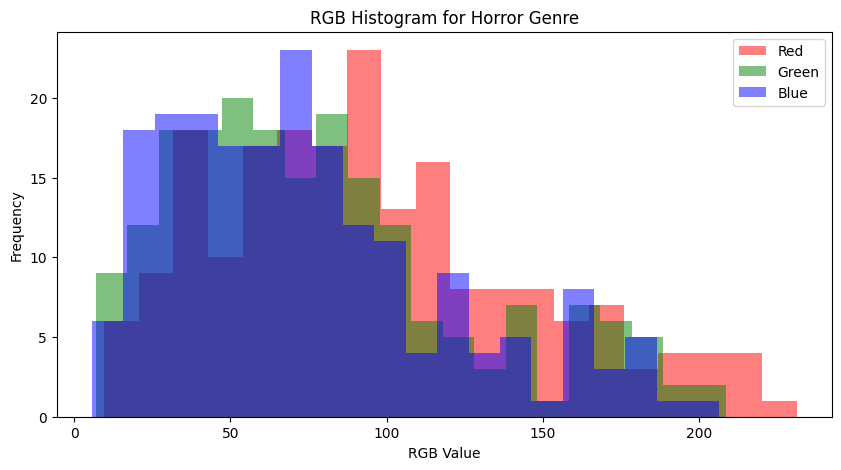

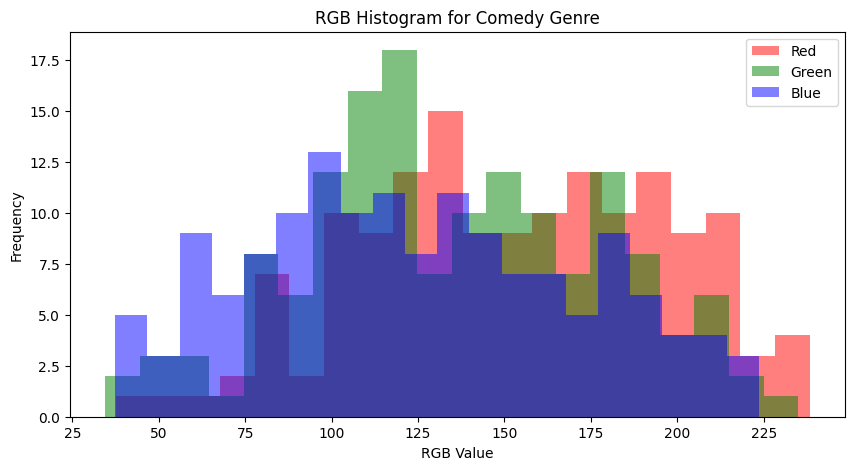

In [10]:
# Plotting a histogram of rgb values for each genre
for genre in df['Genre'].unique():
  genre_df = df[df['Genre'] == genre]
  plt.figure(figsize=(10, 5))
  plt.title(f'RGB Histogram for {genre} Genre')
  plt.hist(genre_df['avg_r'], bins=20, color='red', alpha=0.5, label='Red')
  plt.hist(genre_df['avg_g'], bins=20, color='green', alpha=0.5, label='Green')
  plt.hist(genre_df['avg_b'], bins=20, color='blue', alpha=0.5, label='Blue')
  plt.xlabel('RGB Value')
  plt.ylabel('Frequency')
  plt.legend()
  plt.show()

In [11]:
# Calculating average image brightness and adding to dataframe
def brightness( im_file ):
   im = Image.open(im_file).convert('L')
   stat = ImageStat.Stat(im)
   return stat.mean[0]

brightness_values = []

for i in range(550):
    if i == 444 or i == 496:
      brightness_values.append(np.NaN)
    else:
      image = f'/content/images/image_{i}.jpg'
      pbrightness = brightness(image)
      brightness_values.append(pbrightness)


df["brightness"] = brightness_values

df.head()

,Genre,MoviePoster,Movie Title,LocalImagePath,avg_r,avg_g,avg_b,brightness
0,Romance,https://m.media-amazon.com/images/M/MV5BYjA4MT...,Malena,/content/images/image_0.jpg,176.973632,121.381402,66.941580,131.799367
1,Romance,https://m.media-amazon.com/images/M/MV5BOTNmYz...,Amélie,/content/images/image_1.jpg,49.274581,68.166471,44.005332,59.756123
2,Romance,https://m.media-amazon.com/images/M/MV5BYTY3Mm...,A Very Long Engagement,/content/images/image_2.jpg,141.185515,88.127564,51.819231,99.868042
3,Romance,https://m.media-amazon.com/images/M/MV5BN2Q4Nj...,In the Mood for Love,/content/images/image_3.jpg,95.580159,54.822747,33.206434,64.541134
4,Romance,https://m.media-amazon.com/images/M/MV5BYjIyND...,The Curious Case of Benjamin Button,/content/images/image_4.jpg,96.855737,81.615141,64.857612,84.256123


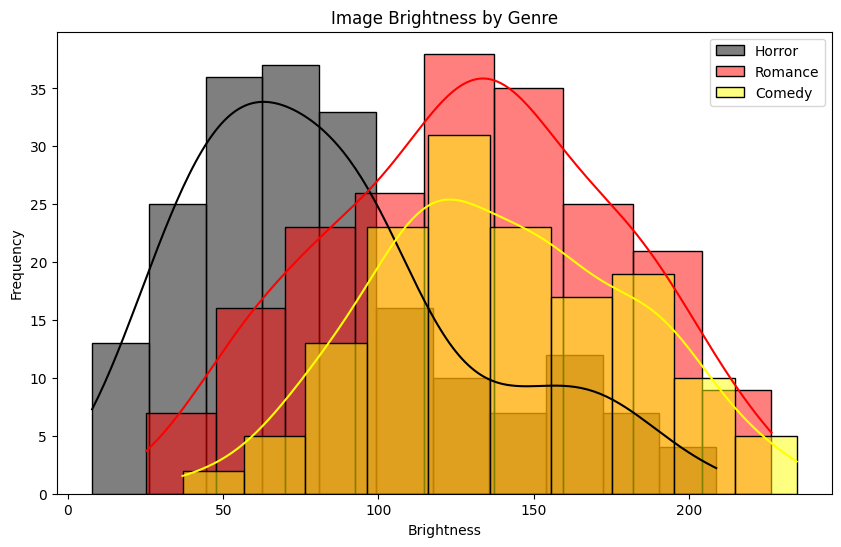

In [12]:
# Plotting a histogram of brightness grouped by genre

plt.figure(figsize=(10, 6))

sns.histplot(df[df['Genre'] == 'Horror']['brightness'], color='black', label='Horror', kde=True)
sns.histplot(df[df['Genre'] == 'Romance']['brightness'], color='red', label='Romance', kde=True)
sns.histplot(df[df['Genre'] == 'Comedy']['brightness'], color='yellow', label='Comedy', kde=True)


plt.xlabel('Brightness')
plt.ylabel('Frequency')
plt.title('Image Brightness by Genre')
plt.legend()
plt.show()

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 140 x 207 to 106 x 161

num_classes = 3
kernel_dimensions1 = (3, 3)
kernel_dimensions2 = (2, 2)

model = Sequential([
      Conv2D(32, kernel_dimensions1, padding='same', input_shape=(106, 161, 3), activation='relu'),
      Conv2D(32, kernel_dimensions1, activation='relu'),
      MaxPooling2D(pool_size=(2, 2)),
      Dropout(0.25),

      Conv2D(64, kernel_dimensions2, padding='same', activation='relu'),
      Conv2D(64, kernel_dimensions2, activation='relu'),
      MaxPooling2D(pool_size=(2, 2)),
      Dropout(0.25),

      Flatten(),
      Dense(512, activation='relu'),
      Dropout(0.5),
      Dense(num_classes, activation='softmax')
  ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
